# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.


 we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

C:\Users\snettani\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [9]:
len(mnist.train.images)

60000

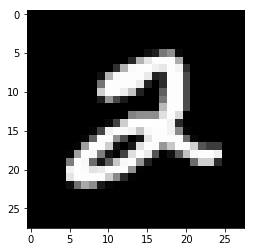

In [11]:
img = mnist.train.images[5]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

# Creating Autoencoder

We'll train an autoencoder with these images by flattening them into 28*28 = 784  length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a single ReLU hidden layer. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a sigmoid activation on the output layer to get values matching the input.

In [12]:
#Size of the encoding(hidden) layer
encoding_dim = 32
image_size = mnist.train.images.shape[1]

inputs = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets = tf.placeholder(tf.float32, (None, image_size), name='targets')

#Output of hidden layer
encoded = tf.layers.dense(inputs, encoding_dim, activation=tf.nn.relu)

#Output of layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)

#Sigmoid output form
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

# Training

In [28]:
#Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss and the test loss afterwards.

Calling mnist.train.next_batch(batch_size) will return a tuple of (images, labels). We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with sess.run(tf.global_variables_initializer()). Then, run the optimizer and get the loss with batch_cost, _ = sess.run([cost, opt], feed_dict=feed).

In [29]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for i in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs: batch[0], targets: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)        
        print("Epoch: {}/{}...".format(e+1, epochs), "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6945
Epoch: 1/20... Training loss: 0.6915
Epoch: 1/20... Training loss: 0.6889
Epoch: 1/20... Training loss: 0.6860
Epoch: 1/20... Training loss: 0.6824
Epoch: 1/20... Training loss: 0.6779
Epoch: 1/20... Training loss: 0.6723
Epoch: 1/20... Training loss: 0.6654
Epoch: 1/20... Training loss: 0.6579
Epoch: 1/20... Training loss: 0.6491
Epoch: 1/20... Training loss: 0.6401
Epoch: 1/20... Training loss: 0.6276
Epoch: 1/20... Training loss: 0.6143
Epoch: 1/20... Training loss: 0.5998
Epoch: 1/20... Training loss: 0.5879
Epoch: 1/20... Training loss: 0.5698
Epoch: 1/20... Training loss: 0.5562
Epoch: 1/20... Training loss: 0.5384
Epoch: 1/20... Training loss: 0.5179
Epoch: 1/20... Training loss: 0.4959
Epoch: 1/20... Training loss: 0.4818
Epoch: 1/20... Training loss: 0.4656
Epoch: 1/20... Training loss: 0.4475
Epoch: 1/20... Training loss: 0.4326
Epoch: 1/20... Training loss: 0.4166
Epoch: 1/20... Training loss: 0.4033
Epoch: 1/20... Training loss: 0.3913
E

Epoch: 1/20... Training loss: 0.1859
Epoch: 1/20... Training loss: 0.1884
Epoch: 1/20... Training loss: 0.1927
Epoch: 1/20... Training loss: 0.1911
Epoch: 1/20... Training loss: 0.1884
Epoch: 1/20... Training loss: 0.1891
Epoch: 1/20... Training loss: 0.1940
Epoch: 1/20... Training loss: 0.1867
Epoch: 1/20... Training loss: 0.1837
Epoch: 1/20... Training loss: 0.1877
Epoch: 1/20... Training loss: 0.1805
Epoch: 1/20... Training loss: 0.1874
Epoch: 1/20... Training loss: 0.1822
Epoch: 1/20... Training loss: 0.1868
Epoch: 1/20... Training loss: 0.1863
Epoch: 1/20... Training loss: 0.1835
Epoch: 1/20... Training loss: 0.1821
Epoch: 1/20... Training loss: 0.1836
Epoch: 1/20... Training loss: 0.1835
Epoch: 1/20... Training loss: 0.1846
Epoch: 1/20... Training loss: 0.1845
Epoch: 1/20... Training loss: 0.1815
Epoch: 1/20... Training loss: 0.1892
Epoch: 1/20... Training loss: 0.1789
Epoch: 1/20... Training loss: 0.1861
Epoch: 1/20... Training loss: 0.1790
Epoch: 1/20... Training loss: 0.1796
E

Epoch: 2/20... Training loss: 0.1579
Epoch: 2/20... Training loss: 0.1554
Epoch: 2/20... Training loss: 0.1560
Epoch: 2/20... Training loss: 0.1594
Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1616
Epoch: 2/20... Training loss: 0.1584
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1478
Epoch: 2/20... Training loss: 0.1600
Epoch: 2/20... Training loss: 0.1598
Epoch: 2/20... Training loss: 0.1541
Epoch: 2/20... Training loss: 0.1513
Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1566
Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1564
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1578
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1540
Epoch: 2/20... Training loss: 0.1593
Epoch: 2/20... Training loss: 0.1579
Epoch: 2/20... Training loss: 0.1533
E

Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1326
Epoch: 3/20... Training loss: 0.1408
Epoch: 3/20... Training loss: 0.1449
Epoch: 3/20... Training loss: 0.1390
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1398
Epoch: 3/20... Training loss: 0.1401
Epoch: 3/20... Training loss: 0.1334
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1407
Epoch: 3/20... Training loss: 0.1406
Epoch: 3/20... Training loss: 0.1378
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1310
Epoch: 3/20... Training loss: 0.1380
Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1430
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1432
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1428
Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1345
E

Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1273
Epoch: 4/20... Training loss: 0.1280
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1277
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1267
Epoch: 4/20... Training loss: 0.1275
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1311
Epoch: 4/20... Training loss: 0.1287
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1213
E

Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1161
Epoch: 4/20... Training loss: 0.1164
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1163
Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1189
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1173
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1159
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1142
Epoch: 4/20... Training loss: 0.1173
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1117
Epoch: 4/20... Training loss: 0.1163
Epoch: 4/20... Training loss: 0.1151
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1132
E

Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1136
Epoch: 5/20... Training loss: 0.1064
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1125
E

Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1011
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1091
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1035
E

Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.0980
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0966
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.0966
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1049
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1025
E

Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.1030
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0945
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0930
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0948
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.1025
E

Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0925
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0960
E

Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0931
Epoch: 9/20... Training loss: 0.0927
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0947
E

Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0925
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0988
Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0980
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0987
Epoch: 12/20... Training loss: 0.0997
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0904
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0902
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0913
Epoch: 12/20... Training loss: 0.0982
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0914
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0979
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0980
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0903
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0969
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0897
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0976
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0973
Epoch: 15/20... Training loss: 0.0975
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0978
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0904
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0892
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0900
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0898
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0977
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0893
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0969
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0885
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0899
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0972
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0973
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0893
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0972
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0896
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0889
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0973
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0976
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0969
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0971
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0981
Epoch: 20/20... Training loss: 0.0897
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0891
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0900
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20

# Checking out the results


Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

10


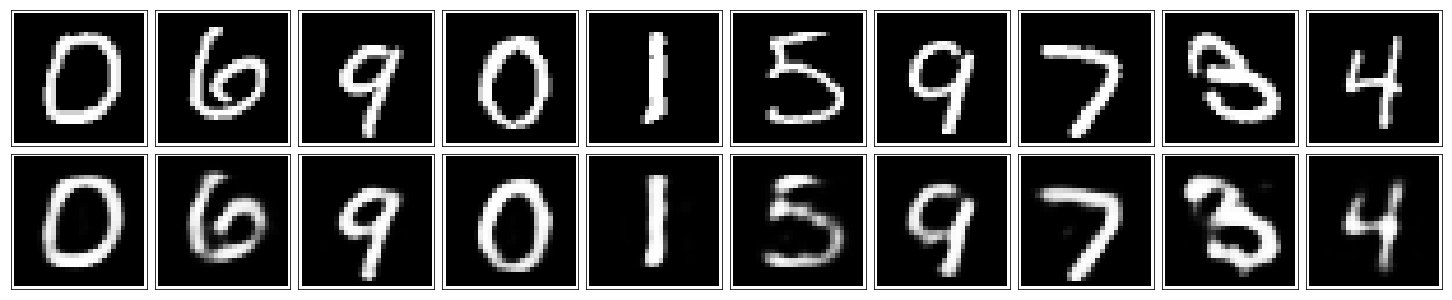

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[10:20]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs:in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28,28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
fig.tight_layout(pad=0.1)

In [38]:
sess.close()